In [83]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 27s 6us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [5]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [6]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [8]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [11]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

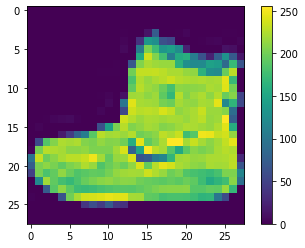

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

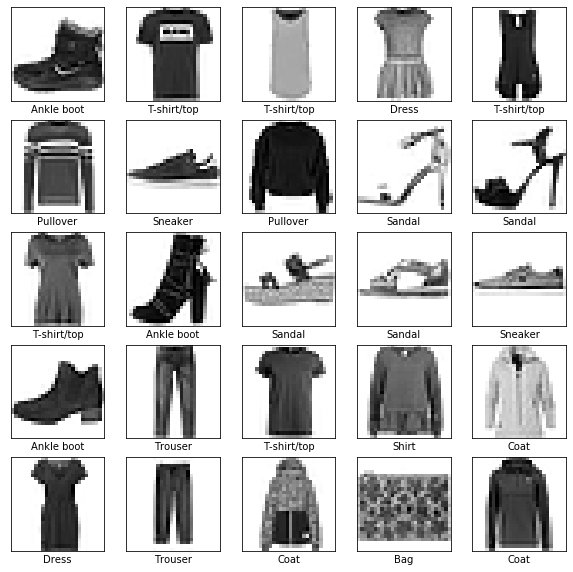

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.



### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [21]:
history=model.fit(train_images, train_labels, epochs=10,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.1760 - accuracy: 0.9330 - val_loss: 0.3669 - val_accuracy: 0.8875
Epoch 2/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.1730 - accuracy: 0.9351 - val_loss: 0.3523 - val_accuracy: 0.8912
Epoch 3/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.1688 - accuracy: 0.9356 - val_loss: 0.3496 - val_accuracy: 0.8908
Epoch 4/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.1645 - accuracy: 0.9379 - val_loss: 0.3637 - val_accuracy: 0.8844
Epoch 5/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.1615 - accuracy: 0.9392 - val_loss: 0.3904 - val_accuracy: 0.8832
Epoch 6/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.1554 - accuracy: 0.9419 - val_loss: 0.3665 - val_accuracy: 0.8910
Epoch 7/10
60000/60000 [=======================

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2148 - accuracy: 0.8889

Test accuracy: 0.8889


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data. An overfitted model "memorizes" the training data—with less accuracy on testing data.

### Evaluate Performance

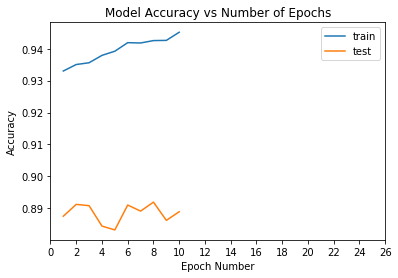

In [23]:
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,28,2))
plt.show()

### Inspecting the output
It's always a good idea to inspect the output. Here we'll look at some examples the model gets right, and some examples it gets wrong.

In [30]:
class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

In [31]:
y_pred = model.predict_classes(test_images)

# Check which items we got right / wrong
correct_indices = np.nonzero(y_pred == test_labels)[0]
incorrect_indices = np.nonzero(y_pred != test_labels)[0]

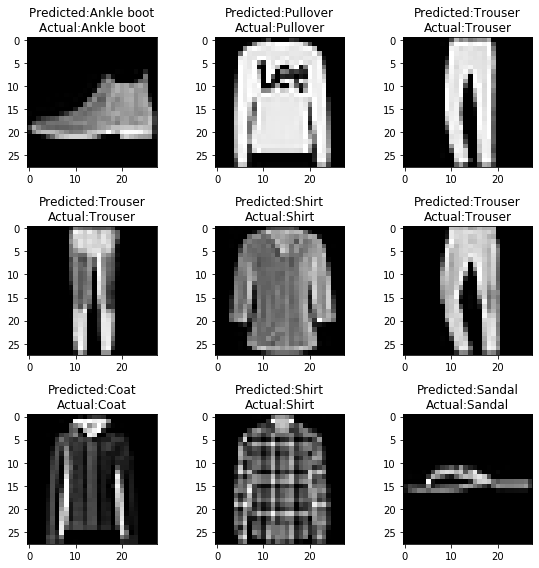

In [33]:
plt.figure(figsize=(8,8))

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted:{}\nActual:{}".format(class_labels_dict[y_pred[correct]],class_labels_dict[test_labels[correct]]))

plt.tight_layout()

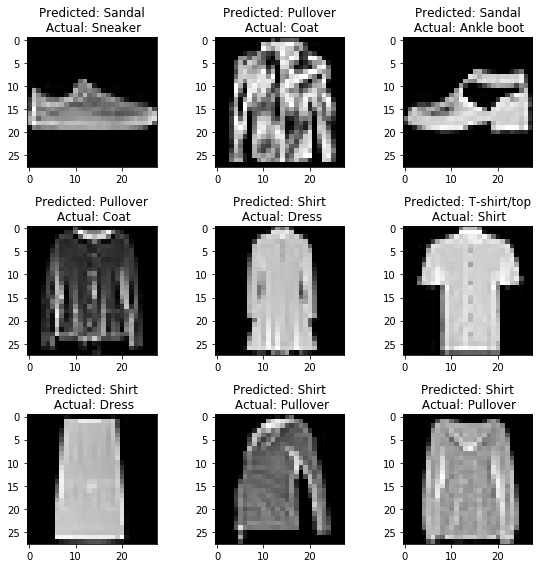

In [35]:
plt.figure(figsize=(8,8))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}\n Actual: {}".format(class_labels_dict[y_pred[incorrect]], class_labels_dict[test_labels[incorrect]]))
    
plt.tight_layout()

# Change the Model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [73]:
chanDim=-1
classes=10
deepModel = keras.Sequential()

deepModel.add(Conv2D(32, (3, 3), padding="same",input_shape=(28, 28,1)))
deepModel.add(Activation("relu"))
deepModel.add(BatchNormalization(axis=chanDim))
deepModel.add(Conv2D(32, (3, 3), padding="same"))
deepModel.add(Activation("relu"))
deepModel.add(BatchNormalization(axis=chanDim))
deepModel.add(MaxPooling2D(pool_size=(2, 2)))
deepModel.add(Dropout(0.25))
# second CONV => RELU => CONV => RELU => POOL layer set
deepModel.add(Conv2D(64, (3, 3), padding="same"))
deepModel.add(Activation("relu"))
deepModel.add(BatchNormalization(axis=chanDim))
deepModel.add(Conv2D(64, (3, 3), padding="same"))
deepModel.add(Activation("relu"))
deepModel.add(BatchNormalization(axis=chanDim))
deepModel.add(MaxPooling2D(pool_size=(2, 2)))
deepModel.add(Dropout(0.25))
# first (and only) set of FC => RELU layers
deepModel.add(Flatten())
deepModel.add(Dense(512))
deepModel.add(Activation("relu"))
deepModel.add(BatchNormalization())
deepModel.add(Dropout(0.5))
# softmax classifier
deepModel.add(Dense(classes))
deepModel.add(Activation("softmax"))


In [76]:
NUM_EPOCHS = 25
INIT_LR = 1e-2
BS = 32
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS),metrics=["accuracy"])

In [77]:
H = model.fit(train_images, train_labels,validation_data=(test_images,test_labels),batch_size=BS,
              epochs=NUM_EPOCHS)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 36s 603us/sample - loss: 1.6681 - accuracy: 0.7932 - val_loss: 1.5944 - val_accuracy: 0.8664
Epoch 2/25
60000/60000 [==============================] - 33s 556us/sample - loss: 1.5861 - accuracy: 0.8751 - val_loss: 1.5908 - val_accuracy: 0.8696
Epoch 3/25
60000/60000 [==============================] - 34s 562us/sample - loss: 1.5726 - accuracy: 0.8884 - val_loss: 1.5789 - val_accuracy: 0.8820
Epoch 4/25
60000/60000 [==============================] - 37s 622us/sample - loss: 1.5640 - accuracy: 0.8970 - val_loss: 1.5826 - val_accuracy: 0.8780
Epoch 5/25
60000/60000 [==============================] - 34s 566us/sample - loss: 1.5612 - accuracy: 0.8996 - val_loss: 1.5791 - val_accuracy: 0.8816
Epoch 6/25
60000/60000 [==============================] - 35s 589us/sample - loss: 1.5535 - accuracy: 0.9076 - val_loss: 1.5750 - val_accuracy: 0.8857
Epoch 7/25
60000/60000 [====================

### Evaluate accuracy

In [78]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 1.5453 - accuracy: 0.8939

Test accuracy: 0.8939


### Evaluate Performance

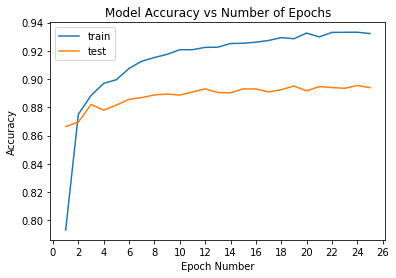

In [79]:
plt.plot(range(1,1+len(H.history['accuracy'])), H.history['accuracy'])
plt.plot(range(1,1+len(H.history['val_accuracy'])), H.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,28,2))
plt.show()

### Inspecting the output

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = [class_labels_dict[x] for x in range(0,10)]
print(classification_report(test_labels, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.86      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.76      0.80      1000
       Dress       0.94      0.84      0.89      1000
        Coat       0.78      0.86      0.82      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.70      0.74      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [85]:
matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), index=target_names, columns=target_names)
matrix.index.name = 'Predicted'
matrix.columns.name = 'Actual'
matrix

Actual,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
Predicted,,,,,,,,,,
T-shirt/top,859,1,15,10,5,2,103,0,5,0
Trouser,4,974,0,9,5,0,6,0,1,1
Pullover,22,0,760,7,113,1,96,0,1,0
Dress,51,9,12,840,49,0,34,0,5,0
Coat,2,1,62,10,858,0,66,0,1,0
Sandal,0,0,0,1,0,956,0,22,0,21
Shirt,125,0,55,9,69,0,736,0,6,0
Sneaker,0,0,0,0,0,7,0,968,1,24
Bag,7,0,4,3,3,2,6,5,970,0
